In [ ]:
# Test print - confirming notebook execution
print("Lab 2.1: Understanding CNN Layers with VGG16")

hi


# Lab 2.1: Understanding CNN Layers with VGG16

**Objective:**  
Visualize internal feature maps of VGG16 to understand how CNNs detect features at different depths.

We analyze:
- block1_conv1 (Early Layer)
- block3_conv3 (Middle Layer)
- block5_conv3 (Deep Layer)

In [20]:
!pip install tensorflow

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

%matplotlib inline

In [ ]:
# Load pre-trained VGG16 model (ImageNet weights) without top classification layer
base_model = VGG16(weights='imagenet', include_top=False)

# Display model architecture
print("VGG16 Model Architecture:")
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define layer names to extract feature maps from different depths
layer_names = [
    'block1_conv1',   # Early layer - detects simple edges/colors
    'block3_conv3',   # Middle layer - detects textures/patterns
    'block5_conv3'    # Deep layer - detects high-level features
]

# Extract outputs from specified layers
outputs = [base_model.get_layer(name).output for name in layer_names]

# Create feature extractor model
feature_extractor = Model(inputs=base_model.input, outputs=outputs)

print("Feature extractor model created successfully!")
print(f"Number of layers: {len(layer_names)}")

Feature extractor created successfully.


367441/367441 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


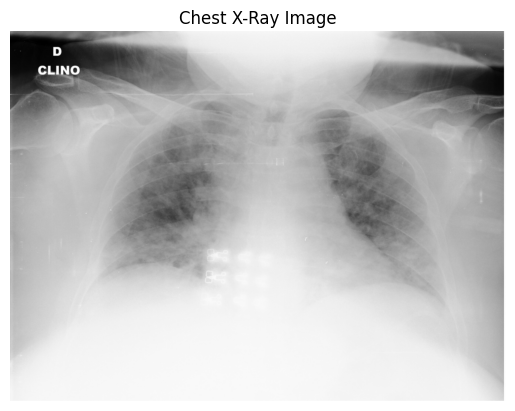

In [ ]:
# Load a sample X-ray image from the web
img_path = tf.keras.utils.get_file(
    "xray.jpg",
    "https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/images/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg"
)

# Load and preprocess image for VGG16
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)

# Add batch dimension and apply VGG16 preprocessing
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Display the input image
plt.imshow(image.load_img(img_path))
plt.title("Sample Chest X-Ray Image", fontsize=12)
plt.axis("off")
plt.show()

In [ ]:
# Extract feature maps from the three layers
feature_maps = feature_extractor.predict(img_array)

print(f"Extracted feature maps from {len(feature_maps)} layers")
print(f"Feature map shapes:")
for i, name in enumerate(layer_names):
    print(f"  {name}: {feature_maps[i].shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Feature maps extracted from 3 layers.


In [ ]:
def plot_feature_maps(feature_map, layer_name, num_filters=16):
    """Visualize the first N filters from a feature map"""
    plt.figure(figsize=(10, 10))
    
    for i in range(num_filters):
        plt.subplot(4, 4, i + 1)
        plt.imshow(feature_map[0, :, :, i], cmap='viridis')
        plt.axis('off')
    
    plt.suptitle(f"{layer_name} - First {num_filters} Filters", fontsize=14)
    plt.tight_layout()
    plt.show()

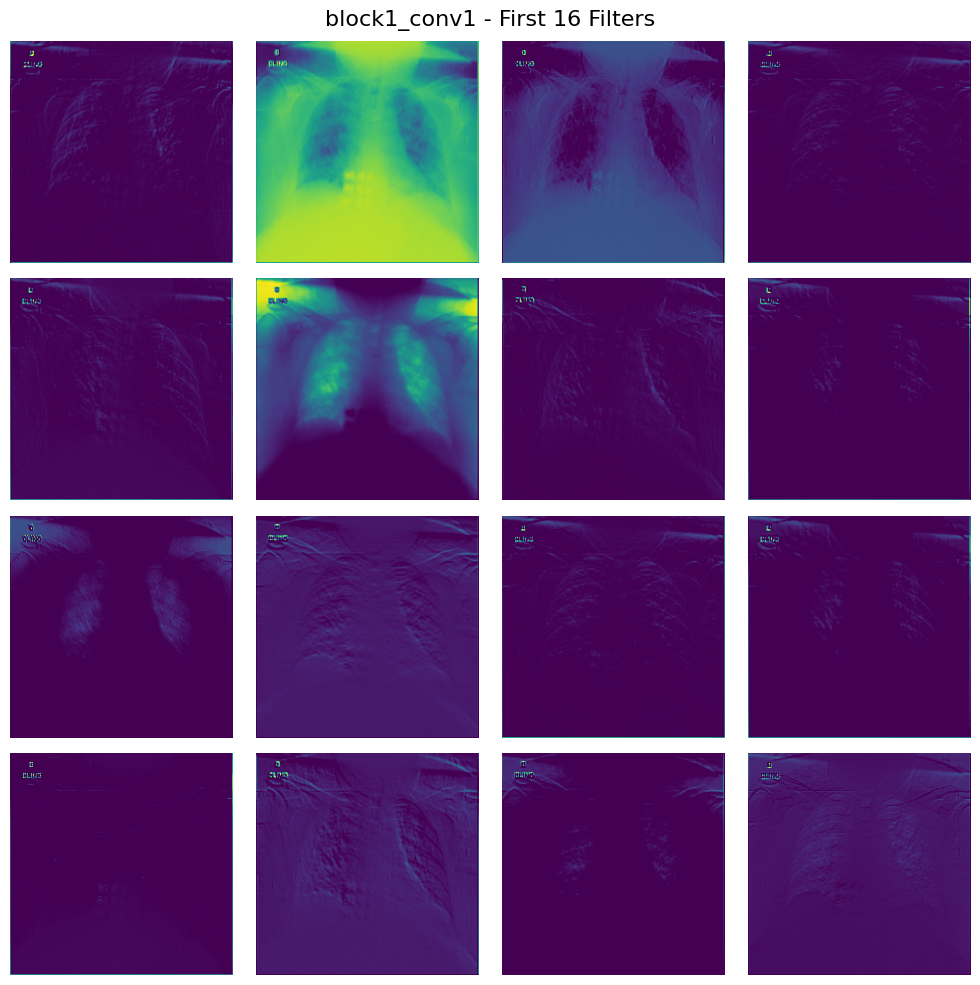

In [ ]:
# Visualize early layer feature maps (block1_conv1)
# Early layers detect simple patterns like edges and colors
plot_feature_maps(feature_maps[0], "Block 1 Conv 1 (Early Layer)")

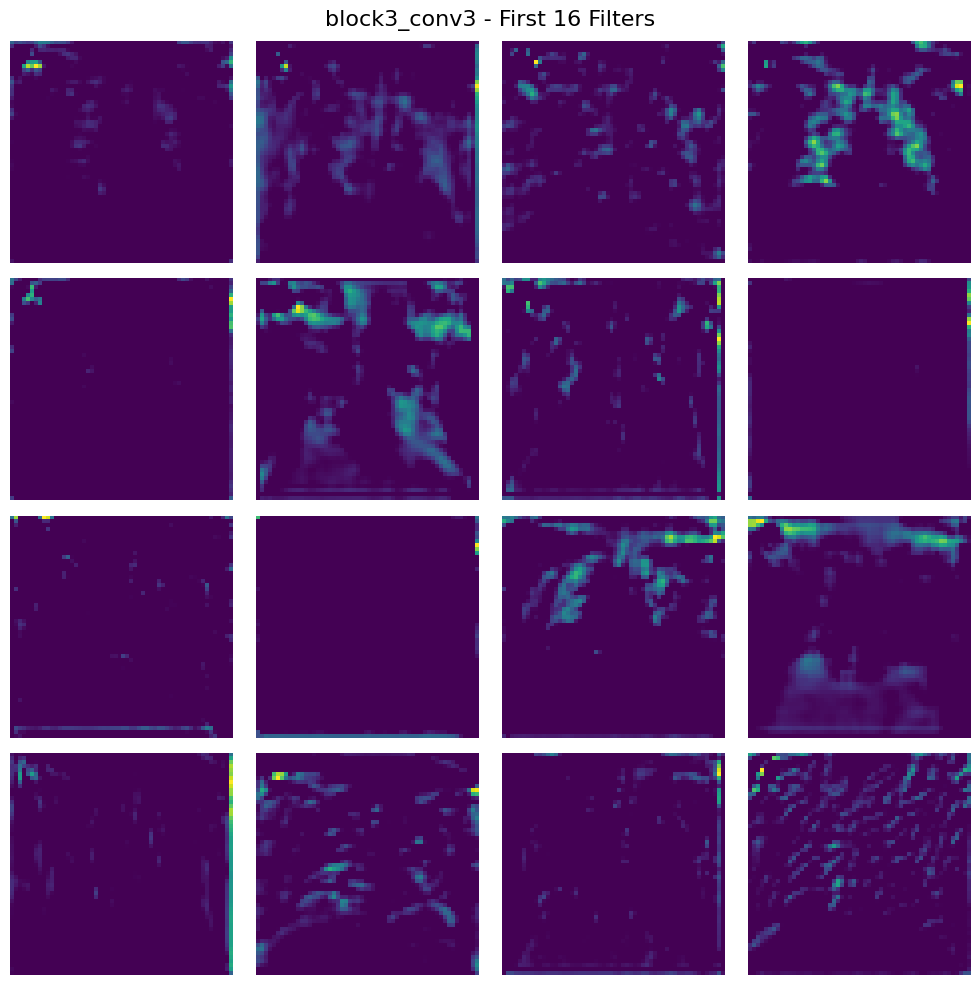

In [ ]:
# Visualize middle layer feature maps (block3_conv3)
# Middle layers detect more complex patterns like textures
plot_feature_maps(feature_maps[1], "Block 3 Conv 3 (Middle Layer)")

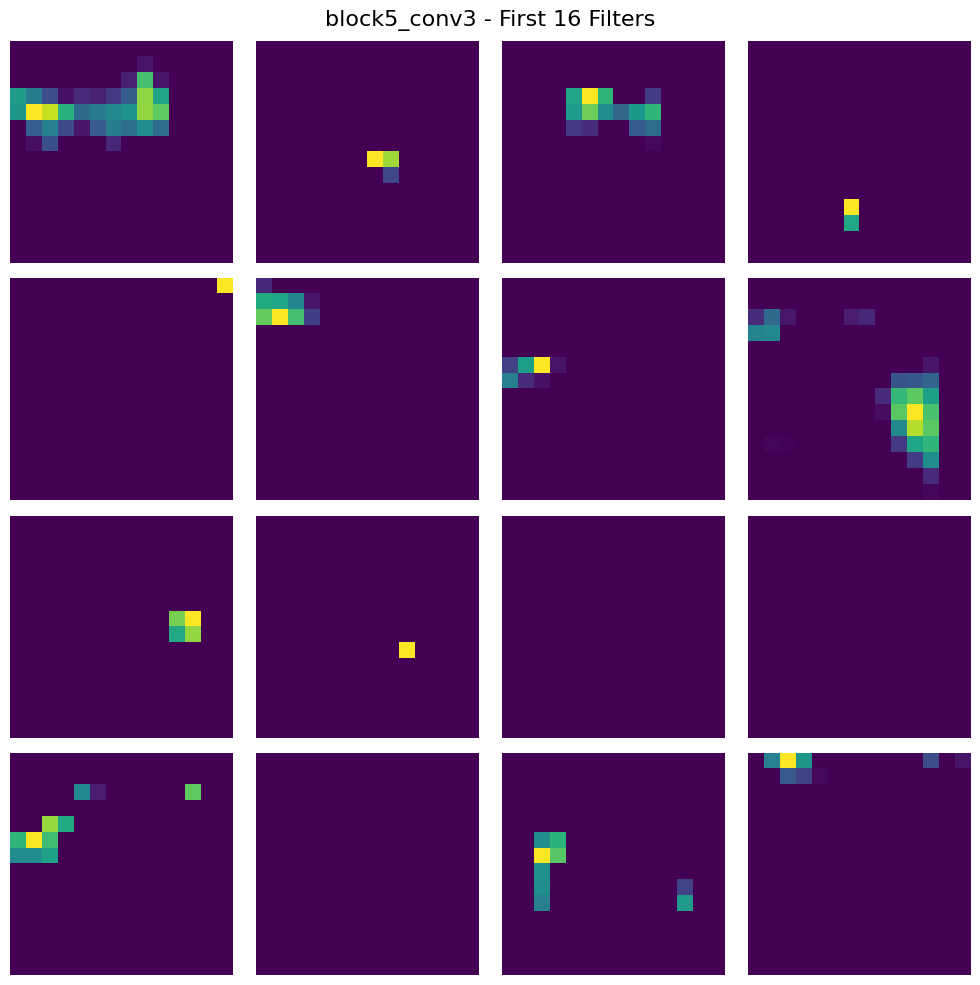

In [ ]:
# Visualize deep layer feature maps (block5_conv3)
# Deep layers detect high-level semantic features specific to the task
plot_feature_maps(feature_maps[2], "Block 5 Conv 3 (Deep Layer)")

## Observations on Chest X-Ray Feature Maps

1. The early layer (block1_conv1) detects basic structural patterns such as edges and contrast boundaries. In the X-ray image, these correspond to rib edges, lung boundaries, and sharp intensity transitions.

2. The middle layer (block3_conv3) captures more complex structural groupings. These feature maps highlight clustered anatomical regions, such as rib cages and lung cavities, indicating spatial aggregation of early edge features.

3. The deep layer (block5_conv3) produces sparse and abstract activations. Since VGG16 was trained on natural images (ImageNet), the deeper filters are not specialized for medical patterns. Therefore, activations are less semantically meaningful for clinical interpretation.

This demonstrates that while early convolutional layers generalize well across domains, deeper layers become task-specific and require fine-tuning for medical applications.